In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn import cluster, tree, decomposition
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Download our dataset
Url = "https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/master/travel.csv"
data = pd.read_csv(Url)

In [3]:
data.head()

,Unnamed: 0,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
0,24636210,2014-11-03 16:02:28,24,2,77,871,36643,456.1151,792280,0,...,0,1,8286,1,0,1,0,63,1258,68
1,19837144,2013-03-13 19:25:01,11,3,205,135,38749,232.4737,961995,0,...,0,1,1842,3,0,1,2,198,786,37
2,13066459,2014-10-13 13:20:25,2,3,66,314,48562,4468.2720,495669,0,...,0,1,8746,1,0,1,6,105,29,22
3,4691082,2013-11-05 10:40:34,11,3,205,411,52752,171.6021,106611,0,...,0,1,6210,3,1,1,2,198,1234,42
4,4878884,2014-06-10 13:34:56,2,3,66,174,50644,NaN,596177,0,...,1,1,12812,5,0,1,2,50,368,83


In [4]:
print ("Rows     : " , data.shape[0])
print ("Columns  : " , data.shape[1])
print ("\nFeatures : \n" ,data.columns.tolist())
print ("\nUnique values :  \n", data.nunique())
print ("\nMissing values :  ", data.isnull().sum().values.sum())
print ("\nUnique values :  \n", data.isnull().sum())

Rows     :  100000
Columns  :  25

Features : 
 ['Unnamed: 0', 'date_time', 'site_name', 'posa_continent', 'user_location_country', 'user_location_region', 'user_location_city', 'orig_destination_distance', 'user_id', 'is_mobile', 'is_package', 'channel', 'srch_ci', 'srch_co', 'srch_adults_cnt', 'srch_children_cnt', 'srch_rm_cnt', 'srch_destination_id', 'srch_destination_type_id', 'is_booking', 'cnt', 'hotel_continent', 'hotel_country', 'hotel_market', 'hotel_cluster']

Unique values :  
 Unnamed: 0                   100000
date_time                     99886
site_name                        41
posa_continent                    5
user_location_country           201
user_location_region            779
user_location_city            10779
orig_destination_distance     62206
user_id                       88863
is_mobile                         2
is_package                        2
channel                          11
srch_ci                        1066
srch_co                        1068
sr

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Unnamed: 0                 100000 non-null  int64  
 1   date_time                  100000 non-null  object 
 2   site_name                  100000 non-null  int64  
 3   posa_continent             100000 non-null  int64  
 4   user_location_country      100000 non-null  int64  
 5   user_location_region       100000 non-null  int64  
 6   user_location_city         100000 non-null  int64  
 7   orig_destination_distance  63915 non-null   float64
 8   user_id                    100000 non-null  int64  
 9   is_mobile                  100000 non-null  int64  
 10  is_package                 100000 non-null  int64  
 11  channel                    100000 non-null  int64  
 12  srch_ci                    99878 non-null   object 
 13  srch_co                    998

In [6]:
# date Conversion

data['srch_ci'] = pd.to_datetime(data['srch_ci'])
data['srch_co'] = pd.to_datetime(data['srch_co'])
data['date_time'] = pd.to_datetime(data['date_time'])
data['date_time'] = pd.to_datetime(data['date_time'].apply(lambda x: x.date()))

data.head()

,Unnamed: 0,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
0,24636210,2014-11-03,24,2,77,871,36643,456.1151,792280,0,...,0,1,8286,1,0,1,0,63,1258,68
1,19837144,2013-03-13,11,3,205,135,38749,232.4737,961995,0,...,0,1,1842,3,0,1,2,198,786,37
2,13066459,2014-10-13,2,3,66,314,48562,4468.2720,495669,0,...,0,1,8746,1,0,1,6,105,29,22
3,4691082,2013-11-05,11,3,205,411,52752,171.6021,106611,0,...,0,1,6210,3,1,1,2,198,1234,42
4,4878884,2014-06-10,2,3,66,174,50644,NaN,596177,0,...,1,1,12812,5,0,1,2,50,368,83


Text(0.5, 1.0, 'Heatmap of Correlation Matrix')

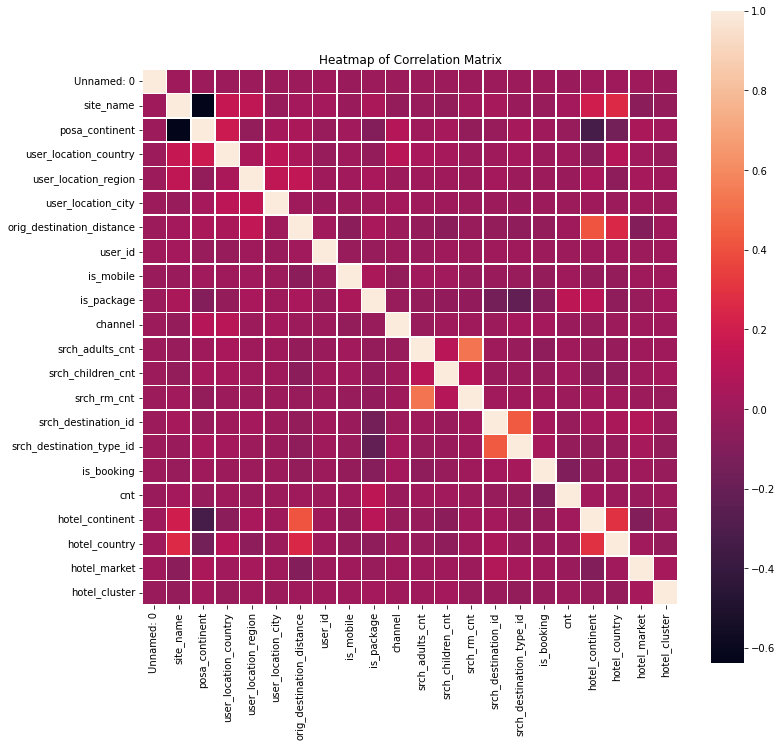

In [7]:
# calculate the correlation matrix
corr = data.corr()

# plot the heatmap
plt.figure(figsize = (12,12))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns , square=True, linewidths=.5)
plt.title('Heatmap of Correlation Matrix')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7facf76939d0>,
      dtype=object)

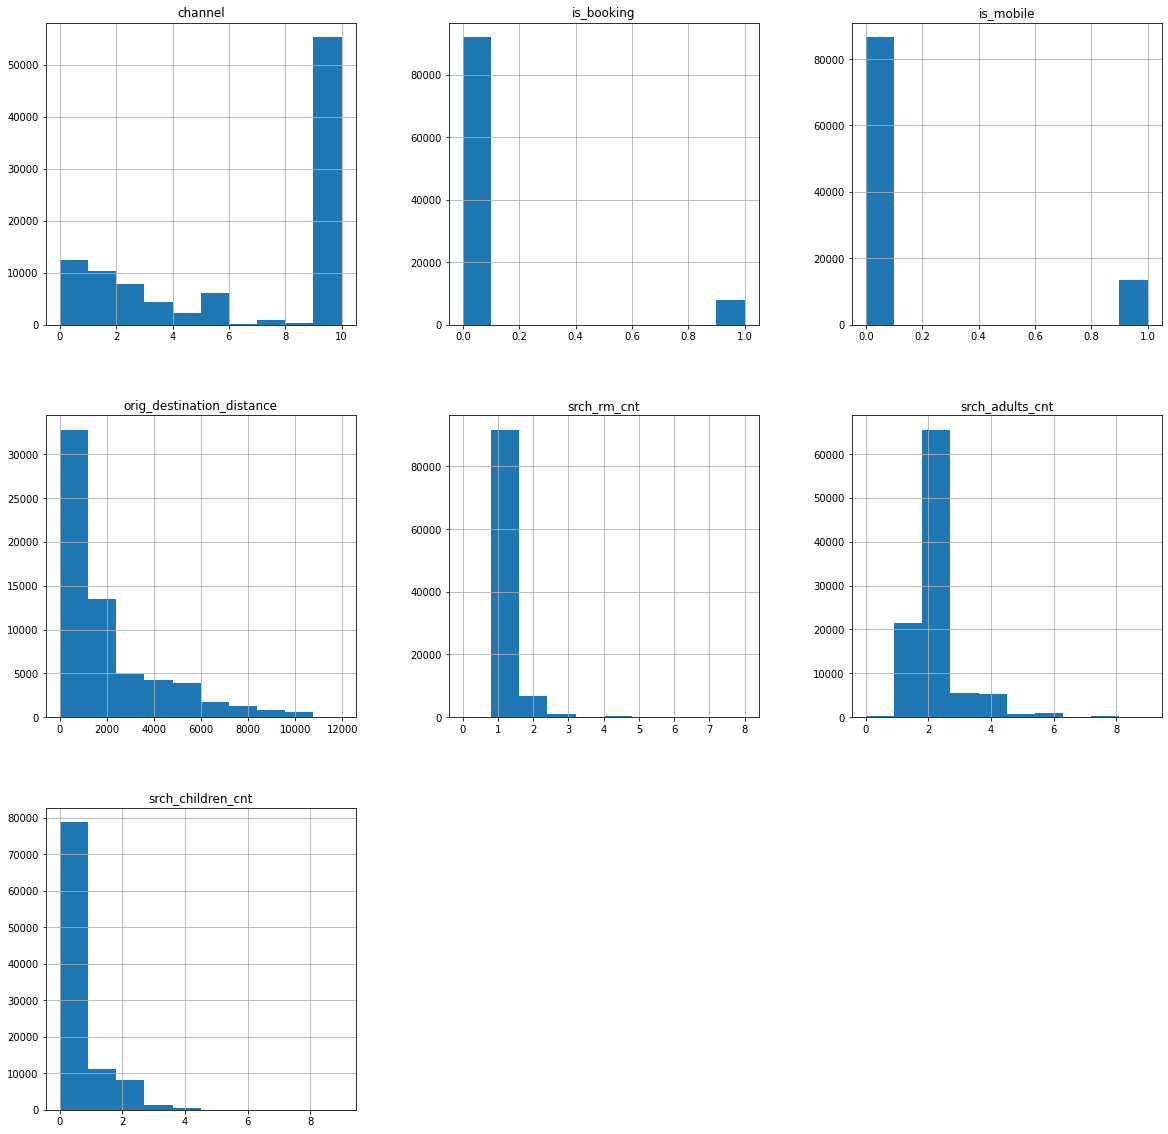

In [8]:
data[['channel', 'is_booking', 'is_mobile', 'orig_destination_distance', 'srch_rm_cnt', 'srch_adults_cnt', 'srch_children_cnt']].hist(figsize=(20,20))


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7facf71eacd0>]],
      dtype=object)

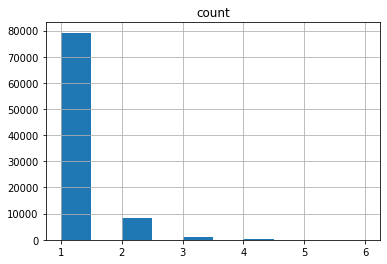

In [9]:
booking_count_per_user = data.groupby('user_id')['is_booking'].agg(['count']).reset_index()

booking_count_per_user[['count']].hist(figsize=(6,4))

In [10]:
def duration(row):
    '''Gives the duration of trip by taking the row as an input and finding the time (in days) beween checkin and checkout'''
    delta = (row['srch_co'] - row['srch_ci'])/np.timedelta64(1, 'D')
    if delta <= 0:
        return np.nan
    else:
        return delta

def days_in_advance(row):
    '''Gives the days the trip was booked in advance'''
    delta = (row['srch_ci'] - row['date_time'])/np.timedelta64(1, 'D')
    if delta < 0:
        return np.nan
    else:
        return delta

# Duration is finds the length of stay by substracting the checkout day from the checkin day
data['duration'] = data.apply(duration, axis=1)

# Shows how long in advance the booking was made. Done by substracting the checkin date from the booking date
data['days_in_advance'] = data.apply(days_in_advance, axis=1)

In [11]:
data.groupby('channel')['is_booking'].agg( booking_rate = 'mean', num_of_bookings = 'count').reset_index().sort_values(by='channel')

,channel,booking_rate,num_of_bookings
0,0,0.071948,12523
1,1,0.069690,10274
2,2,0.060490,7836
3,3,0.060400,4404
4,4,0.120784,2194
5,5,0.094349,6158
6,6,0.067901,162
7,7,0.043157,811
8,8,0.055351,271
9,9,0.085381,55352


#Select feature

In [12]:
# Our selected features
features_to_explore = ['duration', 'days_in_advance', 'orig_destination_distance', 'is_mobile',
            'is_package', 'srch_adults_cnt', 'srch_children_cnt', 'srch_rm_cnt']

city_data = data.dropna(axis=0)[features_to_explore + ['user_location_city']]
city_data = city_data.groupby('user_location_city').mean().reset_index().dropna(axis=0)

In [13]:
city_data.head()

,user_location_city,duration,days_in_advance,orig_destination_distance,is_mobile,is_package,srch_adults_cnt,srch_children_cnt,srch_rm_cnt
0,0,2.0000,78.50,2315.83625,0.0000,0.25,1.7500,0.00,1.0
1,3,4.5625,92.25,3550.01750,0.0625,0.25,1.9375,0.50,1.0
2,7,14.0000,58.00,5994.86400,0.0000,1.00,2.0000,0.00,1.0
3,14,7.0000,35.75,5342.81910,0.0000,0.00,2.0000,0.75,1.0
4,21,5.0000,31.50,2165.76890,0.0000,0.50,1.5000,1.00,1.0


In [14]:
city_data.describe()

,user_location_city,duration,days_in_advance,orig_destination_distance,is_mobile,is_package,srch_adults_cnt,srch_children_cnt,srch_rm_cnt
count,4531.000000,4531.000000,4531.000000,4531.000000,4531.000000,4531.000000,4531.000000,4531.000000,4531.000000
mean,28370.730082,3.371721,56.345617,1796.236344,0.134931,0.251183,2.068621,0.363318,1.120341
std,16461.359756,2.078043,46.340213,1609.729877,0.226245,0.302437,0.657345,0.535894,0.369686
min,0.000000,1.000000,0.000000,0.907100,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13978.000000,2.142857,25.291667,724.472890,0.000000,0.000000,1.857143,0.000000,1.000000
50%,28587.000000,3.000000,47.714286,1435.846152,0.000000,0.169811,2.000000,0.216216,1.000000
75%,42569.500000,4.000000,72.000000,2249.866586,0.192308,0.375000,2.130435,0.500000,1.102564
max,56507.000000,40.000000,366.000000,11428.188600,1.000000,1.000000,9.000000,8.000000,8.000000


#Standardizing

In [15]:
city_data_std = city_data.copy()
cols = ['duration', 'days_in_advance', 'orig_destination_distance',	'is_mobile', 'is_package', 'srch_adults_cnt', 'srch_children_cnt', 'srch_rm_cnt']

city_data_std[cols] = preprocessing.scale(city_data_std[cols])

city_data_std.head()

,user_location_city,duration,days_in_advance,orig_destination_distance,is_mobile,is_package,srch_adults_cnt,srch_children_cnt,srch_rm_cnt
0,0,-0.660175,0.478134,0.322823,-0.596460,-0.003914,-0.484763,-0.678042,-0.325558
1,3,0.573092,0.774885,1.089608,-0.320181,-0.003914,-0.199493,0.255082,-0.325558
2,7,5.115126,0.035705,2.608569,-0.596460,2.476215,-0.104403,-0.678042,-0.325558
3,14,1.746200,-0.444493,2.203459,-0.596460,-0.830623,-0.104403,0.721644,-0.325558
4,21,0.783650,-0.536216,0.229587,-0.596460,0.822796,-0.865123,1.188206,-0.325558


In [16]:
city_data_std.describe()

,user_location_city,duration,days_in_advance,orig_destination_distance,is_mobile,is_package,srch_adults_cnt,srch_children_cnt,srch_rm_cnt
count,4531.000000,4.531000e+03,4.531000e+03,4.531000e+03,4.531000e+03,4.531000e+03,4.531000e+03,4.531000e+03,4.531000e+03
mean,28370.730082,-2.805574e-17,1.201619e-16,-3.437134e-17,5.931644e-16,9.850136e-18,-1.258955e-16,5.677335e-16,5.442323e-16
std,16461.359756,1.000110e+00,1.000110e+00,1.000110e+00,1.000110e+00,1.000110e+00,1.000110e+00,1.000110e+00,1.000110e+00
min,0.000000,-1.141451e+00,-1.216046e+00,-1.115422e+00,-5.964604e-01,-8.306230e-01,-3.147282e+00,-6.780416e-01,-3.255578e-01
25%,13978.000000,-5.914218e-01,-6.702036e-01,-6.658768e-01,-5.964604e-01,-8.306230e-01,-3.217515e-01,-6.780416e-01,-3.255578e-01
50%,28587.000000,-1.789003e-01,-1.862806e-01,-2.239071e-01,-5.964604e-01,-2.690845e-01,-1.044030e-01,-2.745286e-01,-3.255578e-01
75%,42569.500000,3.023748e-01,3.378515e-01,2.818363e-01,2.536310e-01,4.094411e-01,9.404560e-02,2.550822e-01,-4.809179e-02
max,56507.000000,1.762828e+01,6.682933e+00,5.984243e+00,3.824015e+00,2.476215e+00,1.054567e+01,1.425194e+01,1.861150e+01


#Clustering

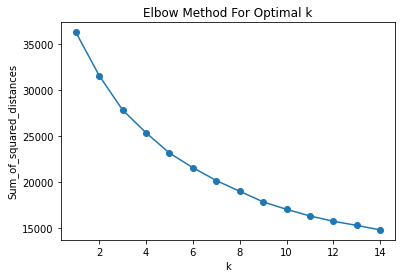

In [17]:
from sklearn.cluster import KMeans

Sum_of_squared_distances = []

# Use k from 1 to 15
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k, max_iter=300, random_state=None)
    km = km.fit(city_data_std[features_to_explore])
    # Get sum of square distances by applying km.inertia_ 
    Sum_of_squared_distances.append(km.inertia_)

# Plot Results
plt.plot(K, Sum_of_squared_distances, marker='o')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

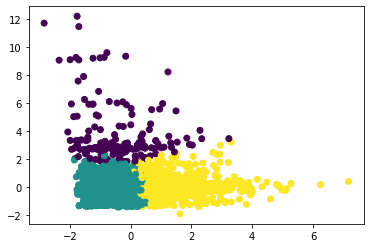

In [18]:
# Let's try arbitrarily 3 clusters 

km = cluster.KMeans(n_clusters=3, max_iter=300, random_state=None)
city_data_std['cluster'] = km.fit_predict(city_data_std[features_to_explore])

# Principal Component Analysis for Visualization
pca = decomposition.PCA(n_components=2, whiten=True)
#pca.fit(city_data[features_to_explore])
city_data_std['x'] = pca.fit_transform(city_data_std[features_to_explore])[:, 0]
city_data_std['y'] = pca.fit_transform(city_data_std[features_to_explore])[:, 1]
plt.scatter(city_data_std['x'], city_data_std['y'], c=city_data_std['cluster'])
plt.show()

In [19]:
city_data_std

,user_location_city,duration,days_in_advance,orig_destination_distance,is_mobile,is_package,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,cluster,x,y
0,0,-0.660175,0.478134,0.322823,-0.596460,-0.003914,-0.484763,-0.678042,-0.325558,1,0.119105,-0.515901
1,3,0.573092,0.774885,1.089608,-0.320181,-0.003914,-0.199493,0.255082,-0.325558,2,0.951140,-0.138827
2,7,5.115126,0.035705,2.608569,-0.596460,2.476215,-0.104403,-0.678042,-0.325558,2,3.856179,-0.285922
3,14,1.746200,-0.444493,2.203459,-0.596460,-0.830623,-0.104403,0.721644,-0.325558,2,1.065450,-0.085451
4,21,0.783650,-0.536216,0.229587,-0.596460,0.822796,-0.865123,1.188206,-0.325558,2,0.457189,-0.527191
...,...,...,...,...,...,...,...,...,...,...,...,...
4526,56472,-0.114730,0.486047,-0.303356,0.287635,0.271656,-0.205832,-0.180376,0.035148,1,0.123670,-0.082743
4527,56488,1.264925,1.621975,2.568813,-0.596460,-0.830623,-0.865123,-0.678042,-0.325558,2,1.904998,-0.510621
4528,56498,0.543012,-0.126160,0.927190,1.613777,0.822796,1.417036,1.188206,1.027089,2,0.532008,1.535868
4529,56505,-0.660175,-0.719662,-0.264337,3.824015,-0.830623,-0.104403,-0.678042,-0.325558,1,-1.051479,-0.412116


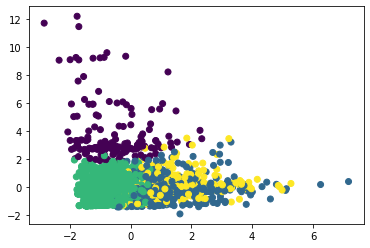

In [20]:
# 4 clusters 

km = cluster.KMeans(n_clusters=4, max_iter=300, random_state=None)
city_data_std['cluster'] = km.fit_predict(city_data_std[features_to_explore])

# Principal Component Analysis for Visualization
pca = decomposition.PCA(n_components=2, whiten=True)
#pca.fit(city_data[features_to_explore])
city_data_std['x'] = pca.fit_transform(city_data_std[features_to_explore])[:, 0]
city_data_std['y'] = pca.fit_transform(city_data_std[features_to_explore])[:, 1]
plt.scatter(city_data_std['x'], city_data_std['y'], c=city_data_std['cluster'])
plt.show()

In [21]:
# Let'sstick with 3 clusters 

km = cluster.KMeans(n_clusters=3, max_iter=300, random_state=None)
city_data_std['cluster'] = km.fit_predict(city_data_std[features_to_explore])

# Principal Component Analysis for Visualization
pca = decomposition.PCA(n_components=2, whiten=True)
city_data_std['x'] = pca.fit_transform(city_data_std[features_to_explore])[:, 0]
city_data_std['y'] = pca.fit_transform(city_data_std[features_to_explore])[:, 1]

In [22]:
# We will merge the two dataframes based on a common column user_location_city
city_data.merge(city_data_std[['user_location_city', 'cluster']]).groupby('cluster').mean()

,user_location_city,duration,days_in_advance,orig_destination_distance,is_mobile,is_package,srch_adults_cnt,srch_children_cnt,srch_rm_cnt
cluster,,,,,,,,,
0,28045.576984,2.709872,40.714347,1351.050282,0.142256,0.155283,1.981158,0.371455,1.071359
1,28854.274797,5.103159,96.151808,2952.693453,0.116431,0.504396,2.012018,0.316409,1.069089
2,30963.689024,3.045833,56.794868,1638.348754,0.133587,0.186484,4.166159,0.559502,2.441667


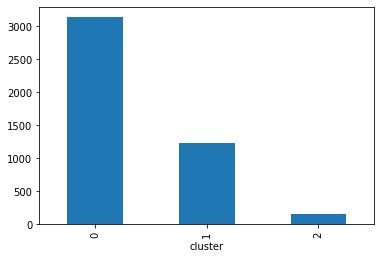

In [23]:
# Plot our Cluster Counts
city_data_std.groupby('cluster')['user_location_city'].agg('count').plot(kind='bar')